In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CURRENT"))

import pickle
import pandas as pd
from source.ensemble.stack_generalization.ramp_detection.utils_plot import plot_ramp_confusion_matrix, plot_ramp_events
from source.ensemble.stack_generalization.ramp_detection.ramp_analysis import load_and_append_results, plot_heatmap

# Set parameters
max_consecutive_points = 3
plot_results = 'TP'
cluster_color = False
plot_prediction = True
plot_iqw = False

In [2]:
list_neighbors_values = [5, 10, 15, 20, 25, 30]
str_most_recent = f'{max_consecutive_points}_consecutive'

In [3]:
# Define the file paths for symmetric and asymmetric datasets
file_paths_f1 = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{knn}_f1_lof.pkl' for knn in list_neighbors_values]
file_paths_roc_auc = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{knn}_roc_auc_lof.pkl' for knn in list_neighbors_values]
file_paths_csi = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{knn}_csi_lof.pkl' for knn in list_neighbors_values]
file_paths_bs = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{knn}_bs_lof.pkl' for knn in list_neighbors_values]

In [4]:
list_results_f1 = load_and_append_results(file_paths_f1, ['n_neighbors', 'contamination', 'f1'])
list_results_roc_auc = load_and_append_results(file_paths_roc_auc, ['n_neighbors', 'contamination', 'roc_auc'])
list_results_csi = load_and_append_results(file_paths_csi, ['n_neighbors', 'contamination', 'csi'])
list_results_bs = load_and_append_results(file_paths_bs, ['n_neighbors', 'contamination', 'bs'])

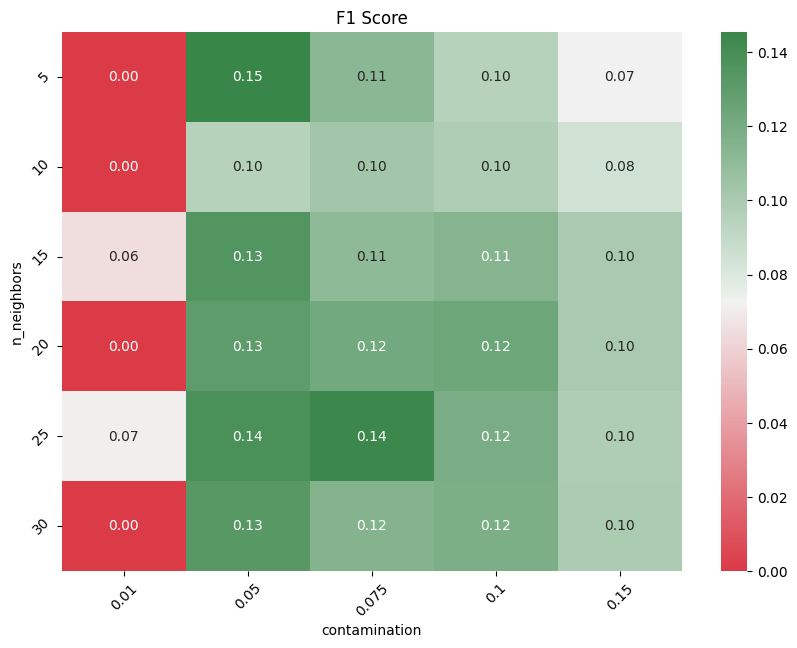

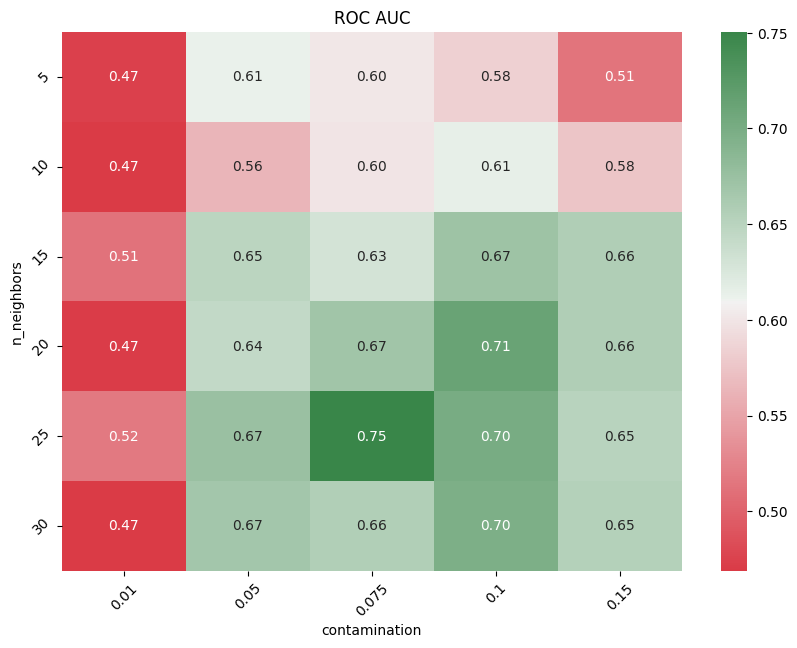

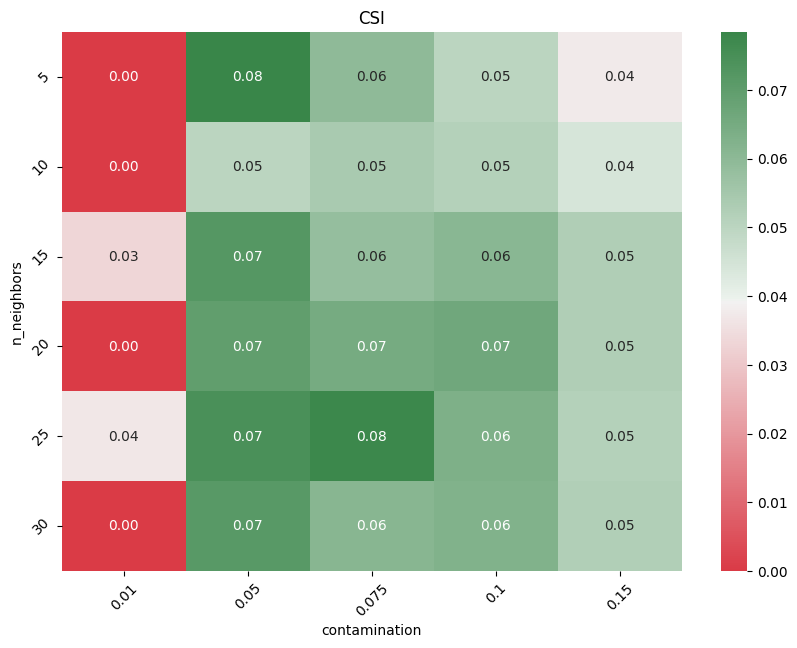

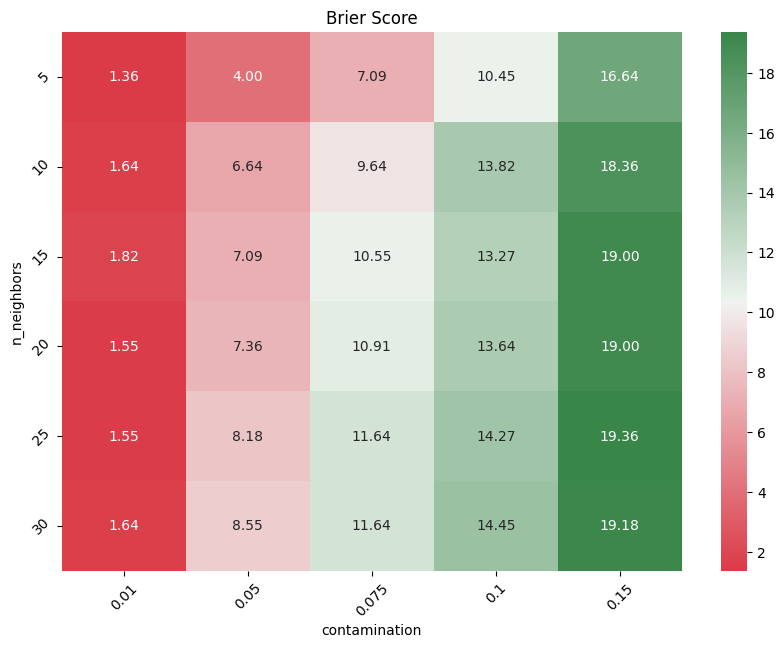

In [5]:
plot_heatmap(list_results_f1, 'f1', 'F1 Score')
plot_heatmap(list_results_roc_auc, 'roc_auc', 'ROC AUC')
plot_heatmap(list_results_csi, 'csi', 'CSI')
plot_heatmap(list_results_bs, 'bs', 'Brier Score')

Critical Success Index (CSI): 0.08
Bias Score (BS): 11.64
F1 Score: 0.14
ROC AUC: 0.75


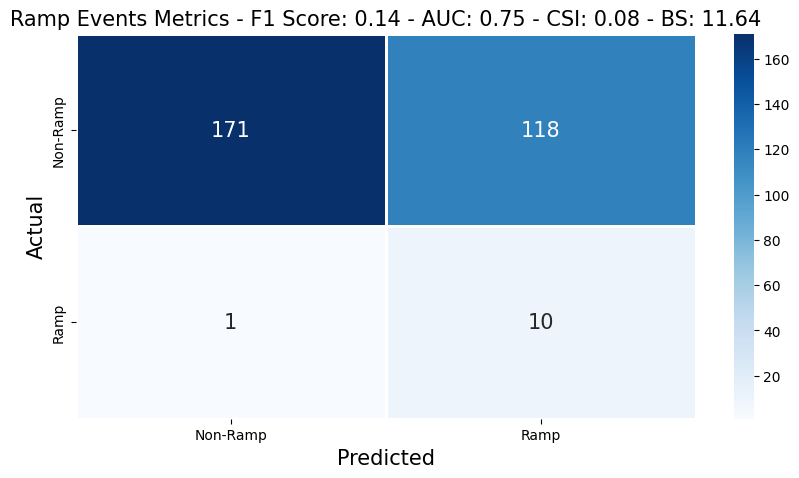

In [6]:
n_neighbors = 25
contamination = 0.075

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{n_neighbors}_f1_lof.pkl', 'rb') as f:
    data = pickle.load(f)

ramp_events_by_date = [data[i]['ramp_events_by_date'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
list_ramp_alarm_days = [data[i]['alarms_days'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
ramp_threshold = [data[i]['ramp_threshold'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]

f1, roc_auc, csi, bs, fpr, tpr = plot_ramp_confusion_matrix(ramp_events_by_date)

Critical Success Index (CSI): 0.05
Bias Score (BS): 15.09
F1 Score: 0.09
ROC AUC: 0.77


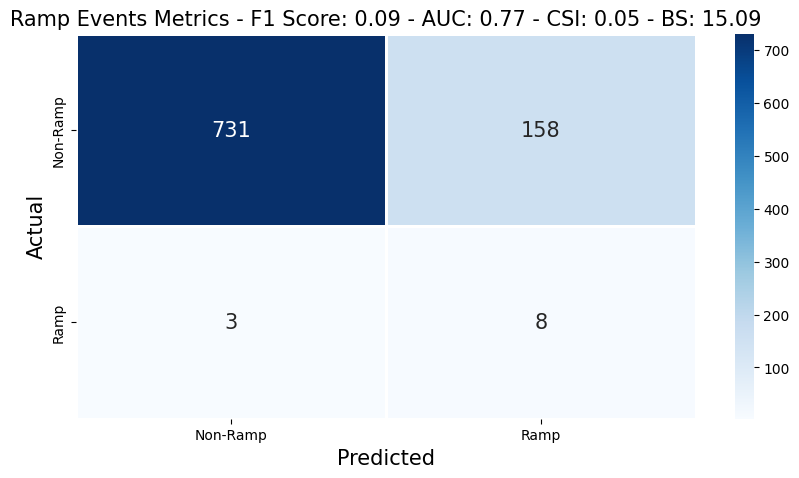

In [7]:

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{n_neighbors}_f1_lof.pkl', 'rb') as f:
    data = pickle.load(f)

ramp_events_by_date = [data[i]['ramp_events_by_intraday'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
list_ramp_alarm_days = [data[i]['alarms_days'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
ramp_threshold = [data[i]['ramp_threshold'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]

f1, roc_auc, csi, bs, fpr, tpr = plot_ramp_confusion_matrix(ramp_events_by_date)

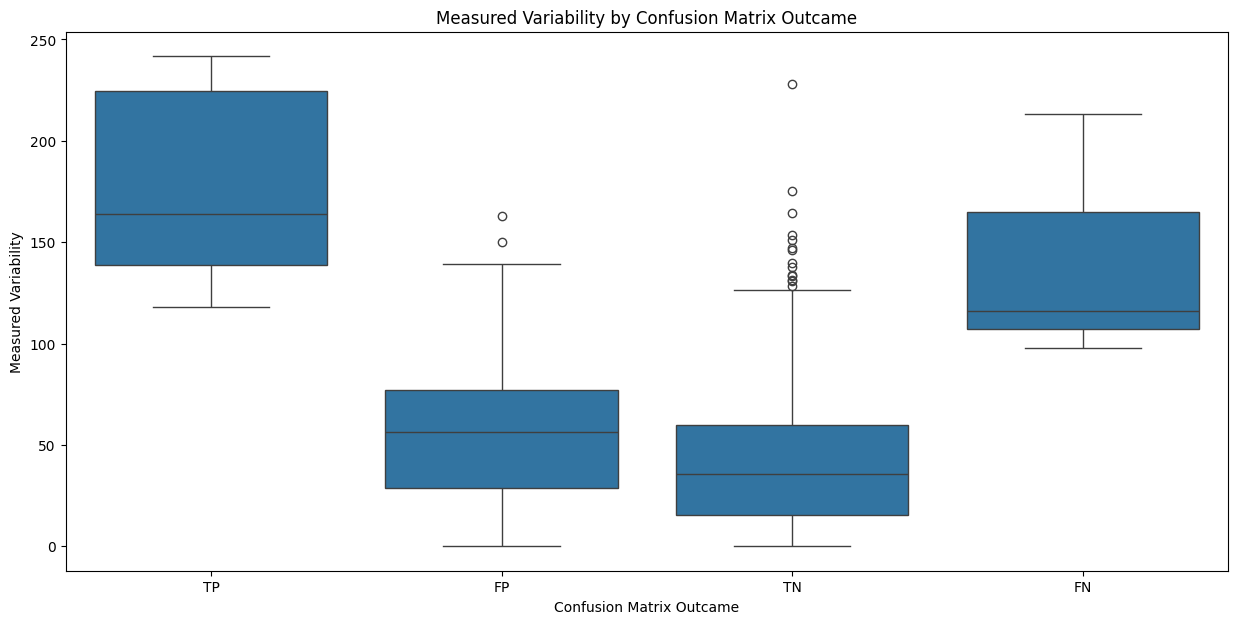

In [8]:
n_neighbors = 25
contamination = 0.075

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{n_neighbors}_f1_lof.pkl', 'rb') as f:
    data = pickle.load(f)

ramp_events_by_intraday = [data[i]['ramp_events_by_intraday'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
list_ramp_alarm_days = [data[i]['alarms_days'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]

from config.ramp_calib_setting import Simulation
import pandas as pd
import pickle
from loguru import logger
from source.utils.file_read import process_and_concat_files 
import matplotlib.pyplot as plt
import seaborn as sns

sim_params = Simulation.testing_period

# process and concatenate files
files = [sim_params['file_1'], sim_params['file_2'], sim_params['file_3'], sim_params['file_4'], 
            sim_params['file_5'], sim_params['file_6'], sim_params['file_7'], sim_params['file_8'], 
            sim_params['file_9'], sim_params['file_10'], sim_params['file_11'], sim_params['file_12']]

df = process_and_concat_files(files)
df_variability = abs(df['measured'].diff()).to_frame()

# add true positive if "predicted" == 1 and "ramp_event"==1
ramp_events_by_intraday['tp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 1)
# add false positive if "predicted" == 1 and "ramp_event"==0
ramp_events_by_intraday['fp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 0)
# add true negative if "predicted" == 0 and "ramp_event"==0
ramp_events_by_intraday['tn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 0)
# add false negative if "predicted" == 0 and "ramp_event"==1
ramp_events_by_intraday['fn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 1)

# groupby 8-hours and compute mean
df_variability_intraday = df_variability.groupby(pd.Grouper(freq='8h')).mean()

# # join with ramp_events_by_date by datetime on ramp_events_by_date
ramp_events_by_intraday = ramp_events_by_intraday.set_index('datetime')

df_variability_intraday = df_variability_intraday.join(ramp_events_by_intraday, how='inner')

# stack plot boxplot of variability by ramp event for true positive, false positive, true negative, false negative
df_variability_tp = df_variability_intraday[df_variability_intraday['tp'] == True]
df_variability_fp = df_variability_intraday[df_variability_intraday['fp'] == True]
df_variability_tn = df_variability_intraday[df_variability_intraday['tn'] == True]
df_variability_fn = df_variability_intraday[df_variability_intraday['fn'] == True]

df_variability_tp = df_variability_tp[['measured']]
df_variability_fp = df_variability_fp[['measured']]
df_variability_tn = df_variability_tn[['measured']]
df_variability_fn = df_variability_fn[['measured']]

df_variability_tp['type'] = 'TP'
df_variability_fp['type'] = 'FP'
df_variability_tn['type'] = 'TN'
df_variability_fn['type'] = 'FN'

df_variability = pd.concat([df_variability_tp, df_variability_fp, df_variability_tn, df_variability_fn])

# plot bar chart with standard error
plt.figure(figsize=(15, 7))
sns.boxplot(x='type', y='measured', data=df_variability, whis=1.5)
plt.ylabel('Measured Variability')
plt.xlabel('Confusion Matrix Outcame')
plt.title('Measured Variability by Confusion Matrix Outcame')
plt.show()

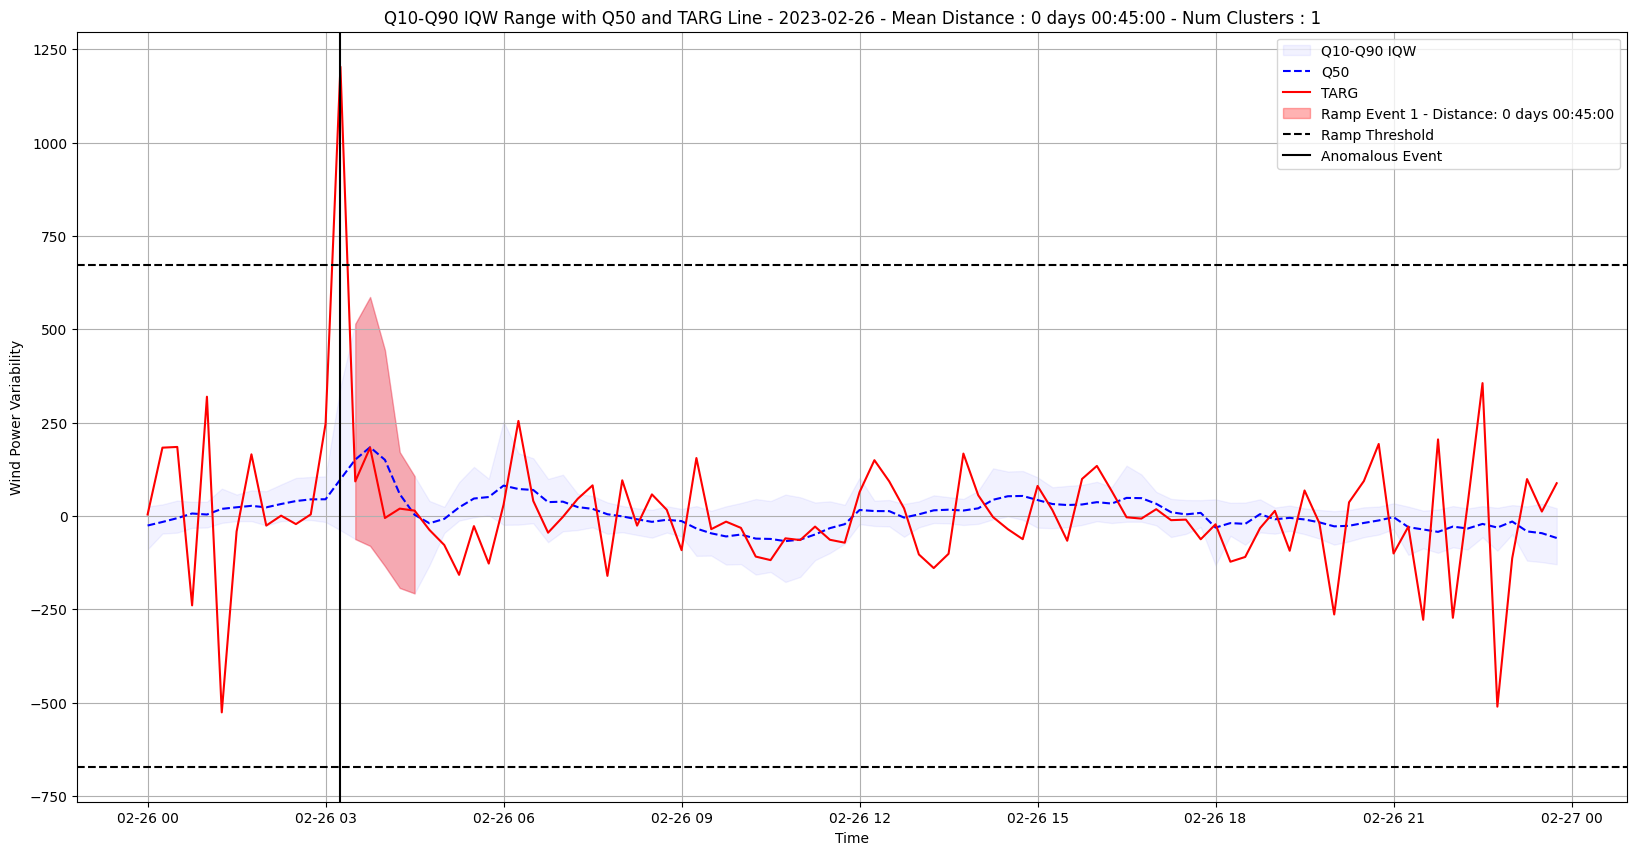

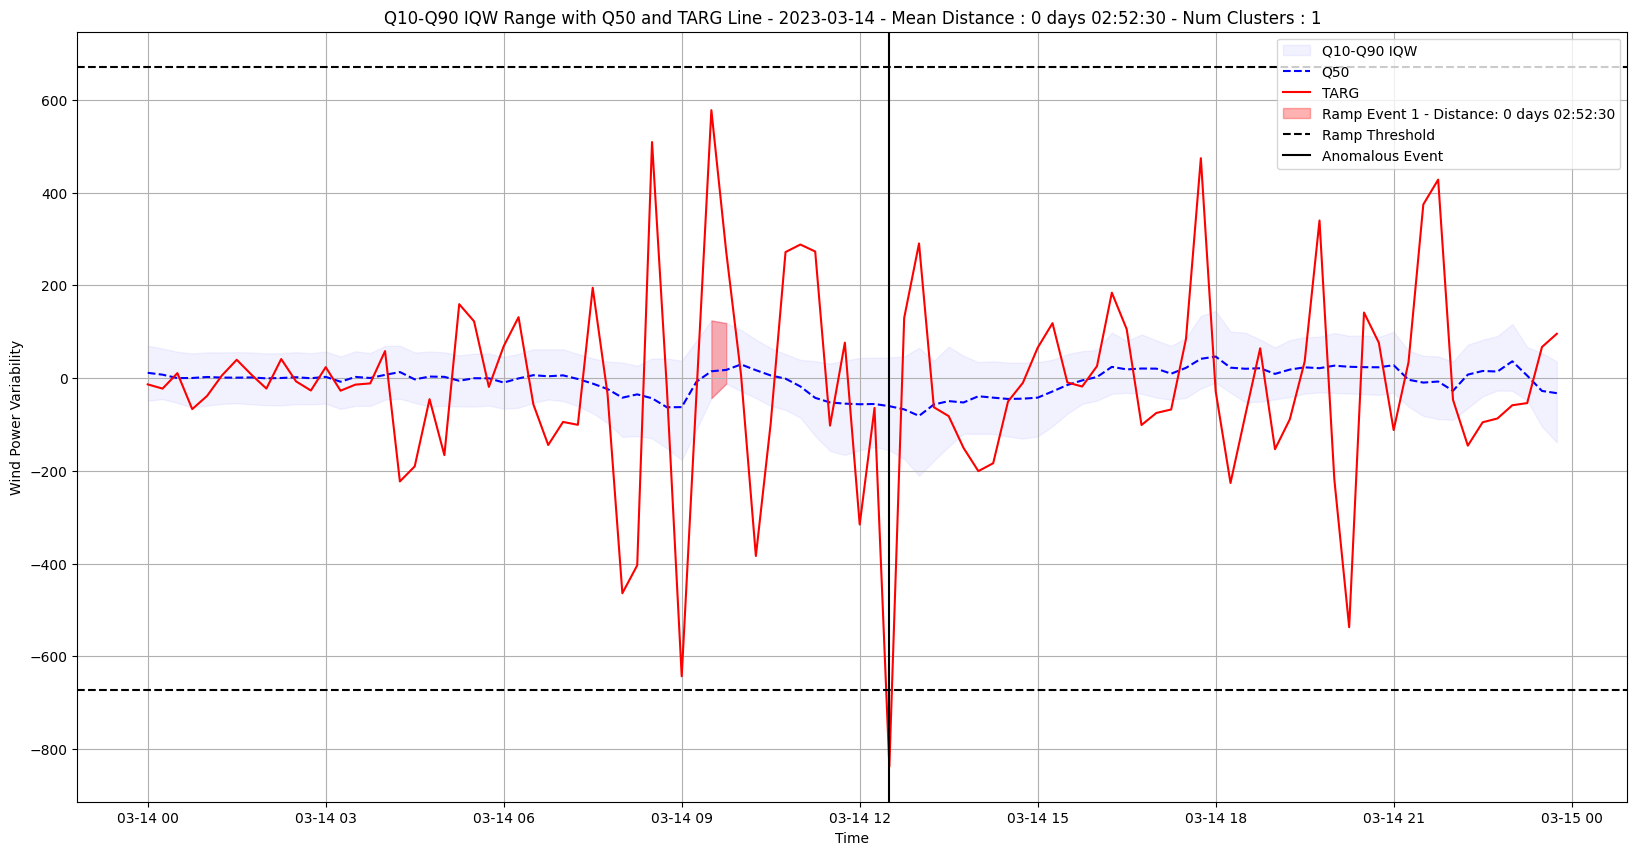

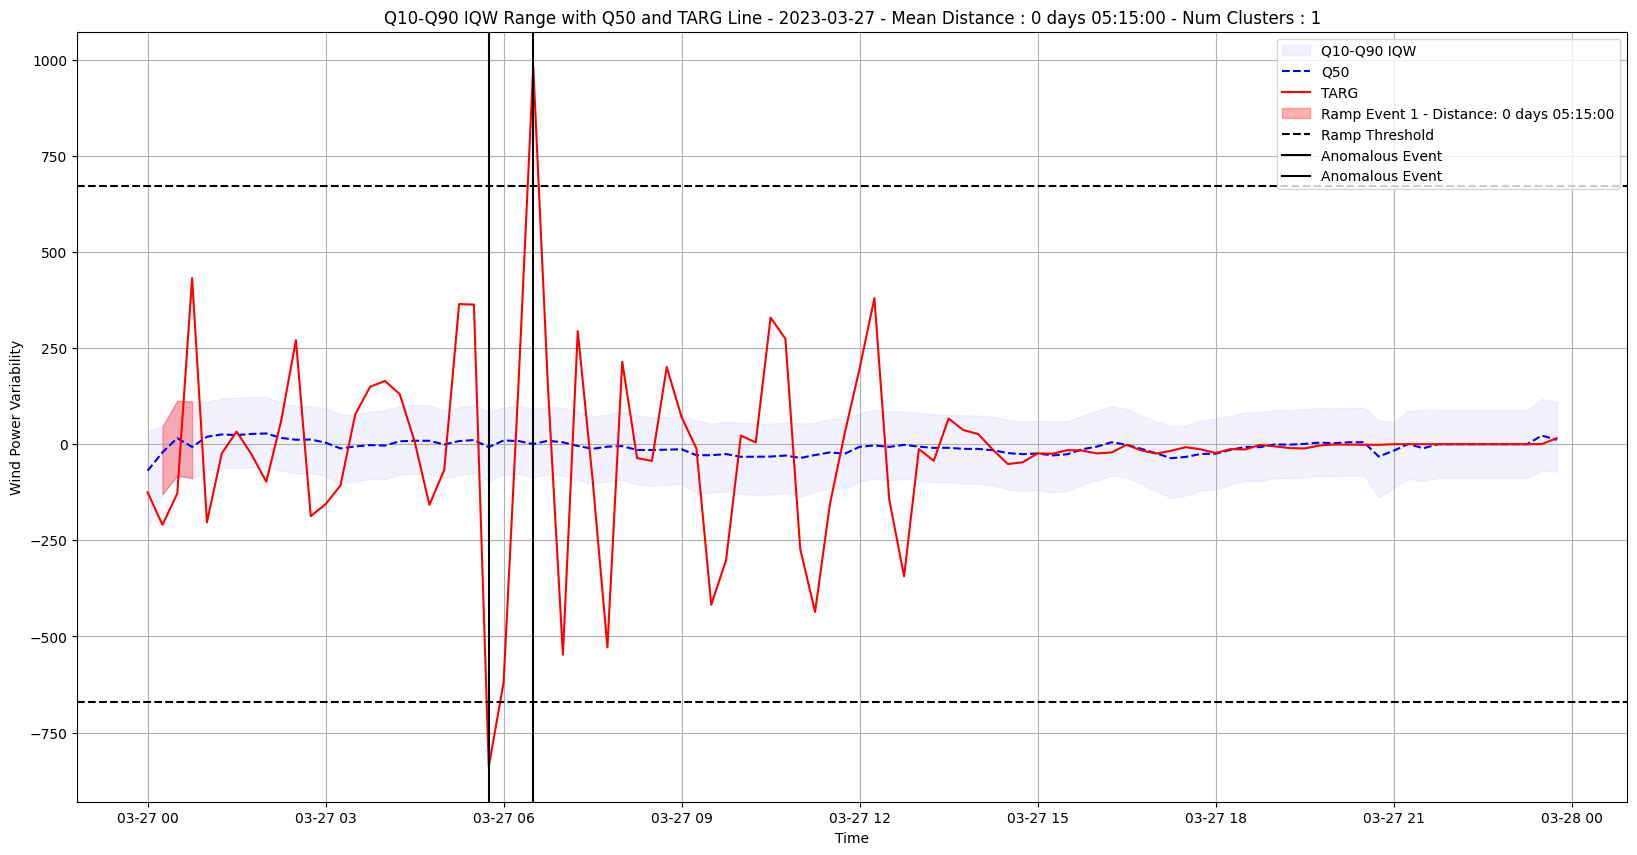

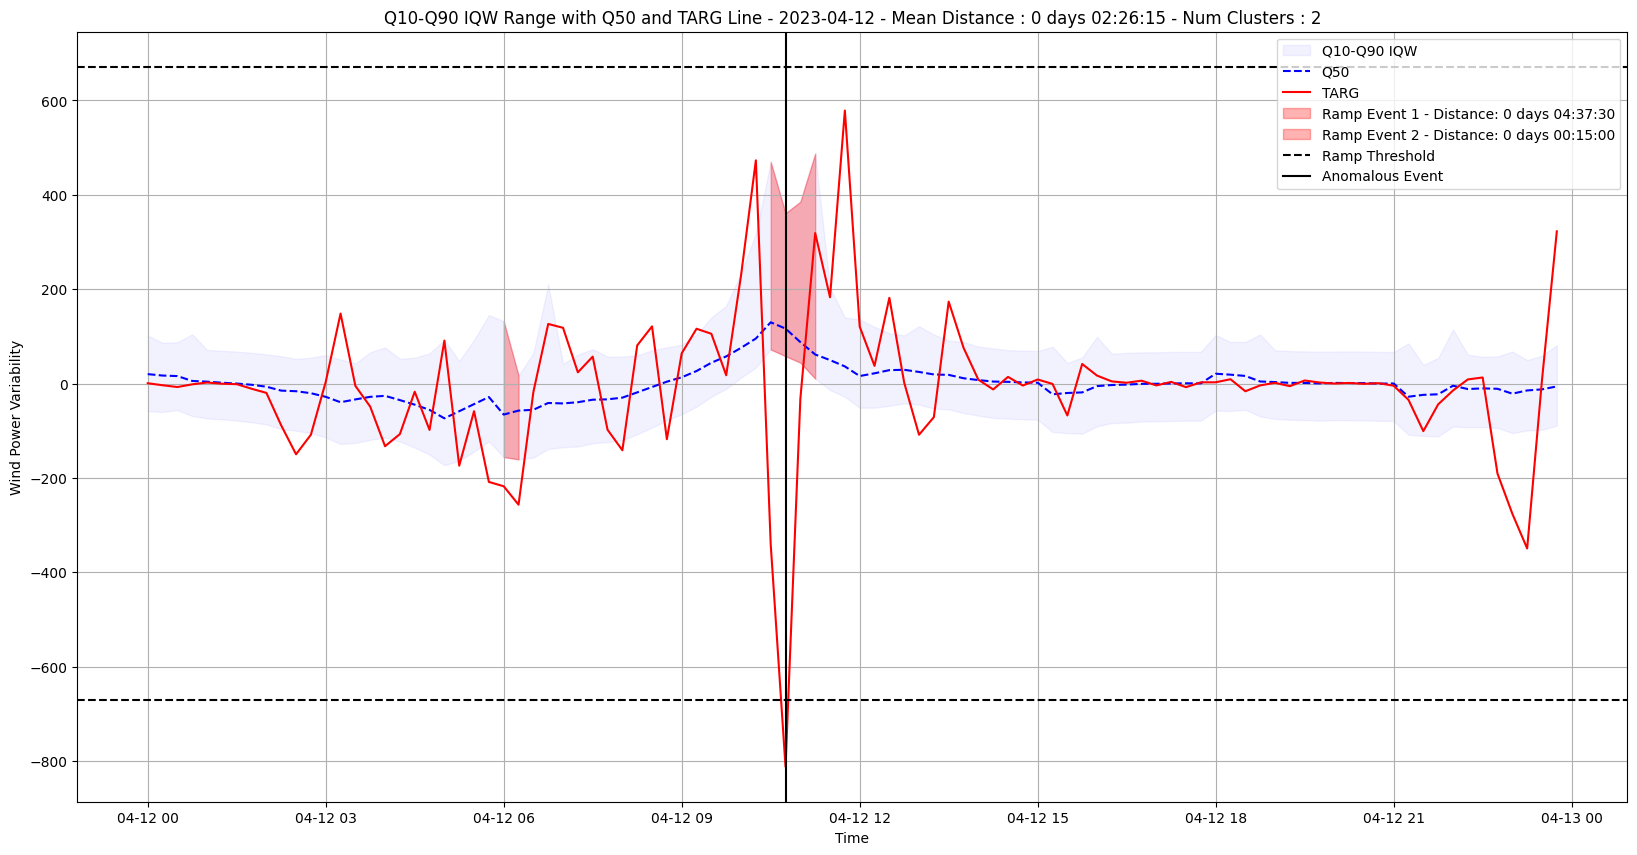

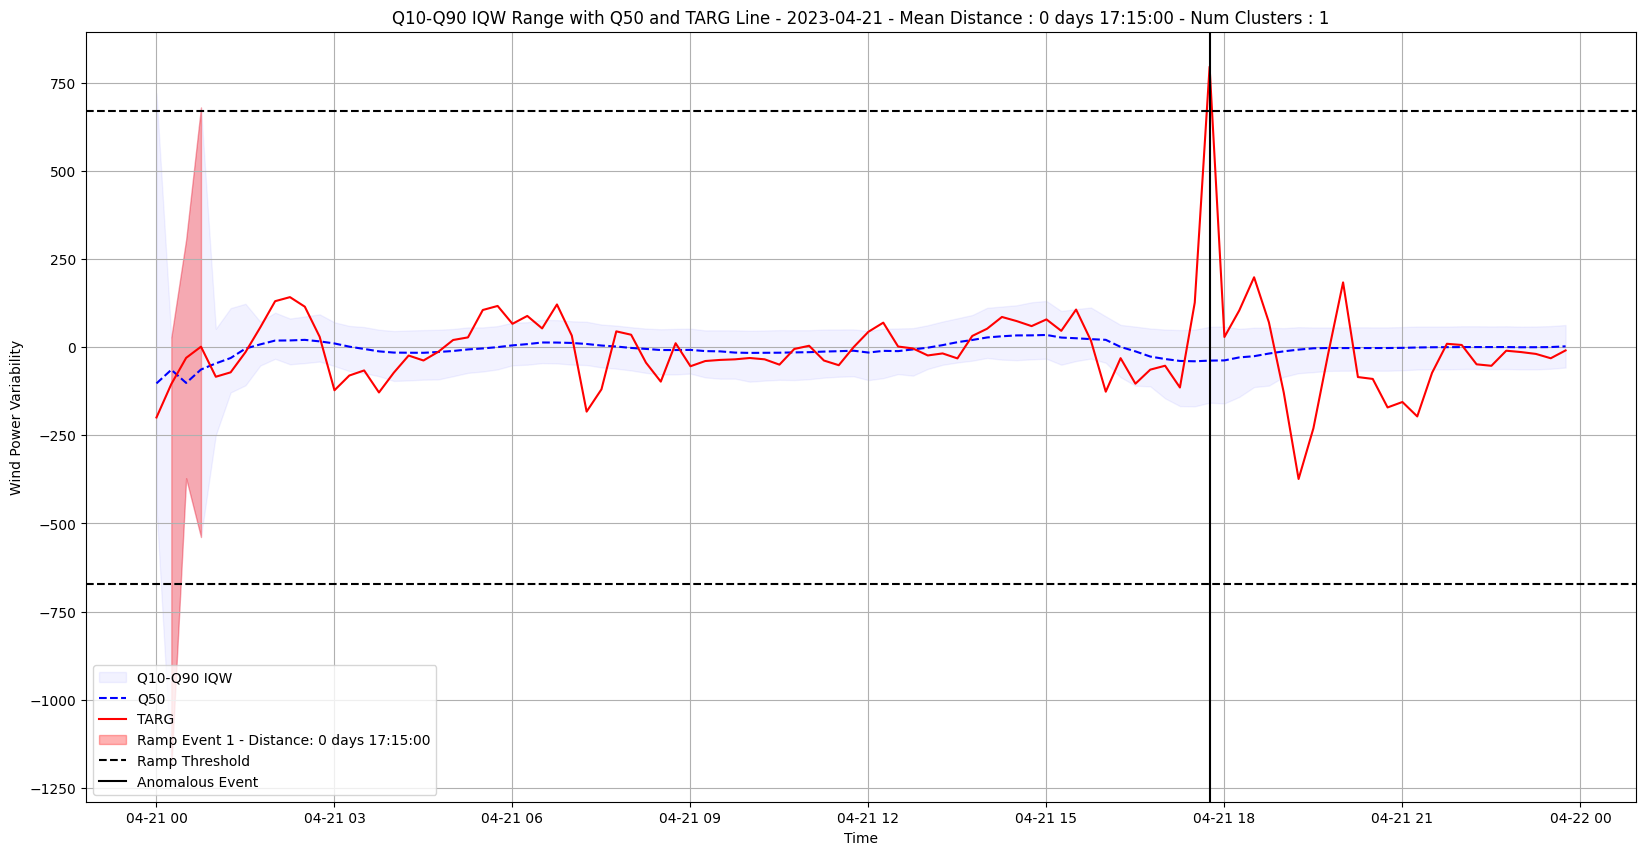

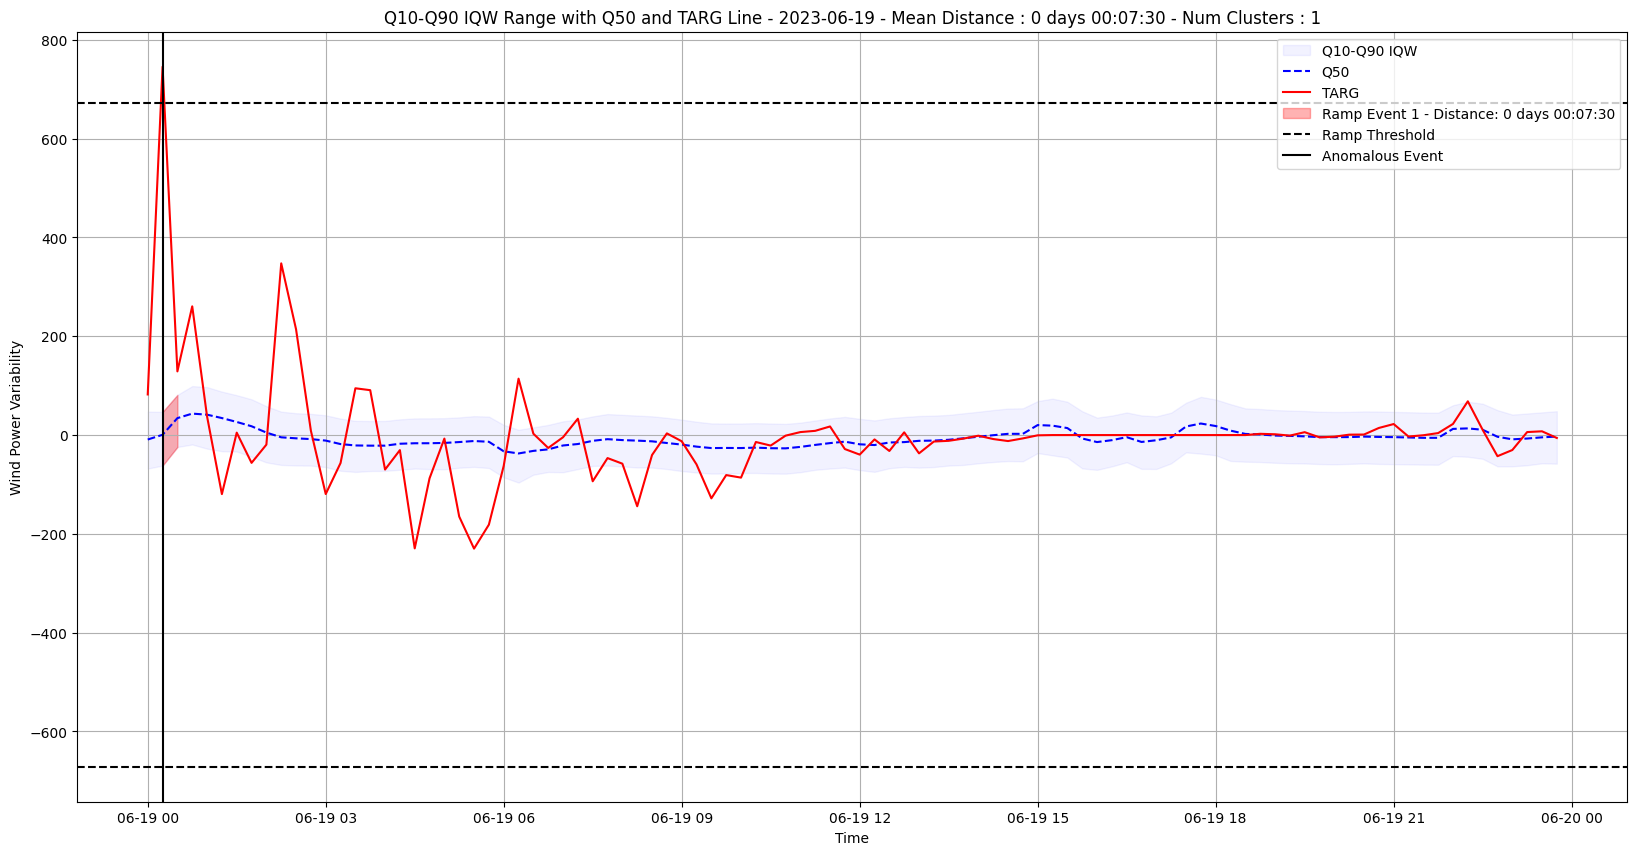

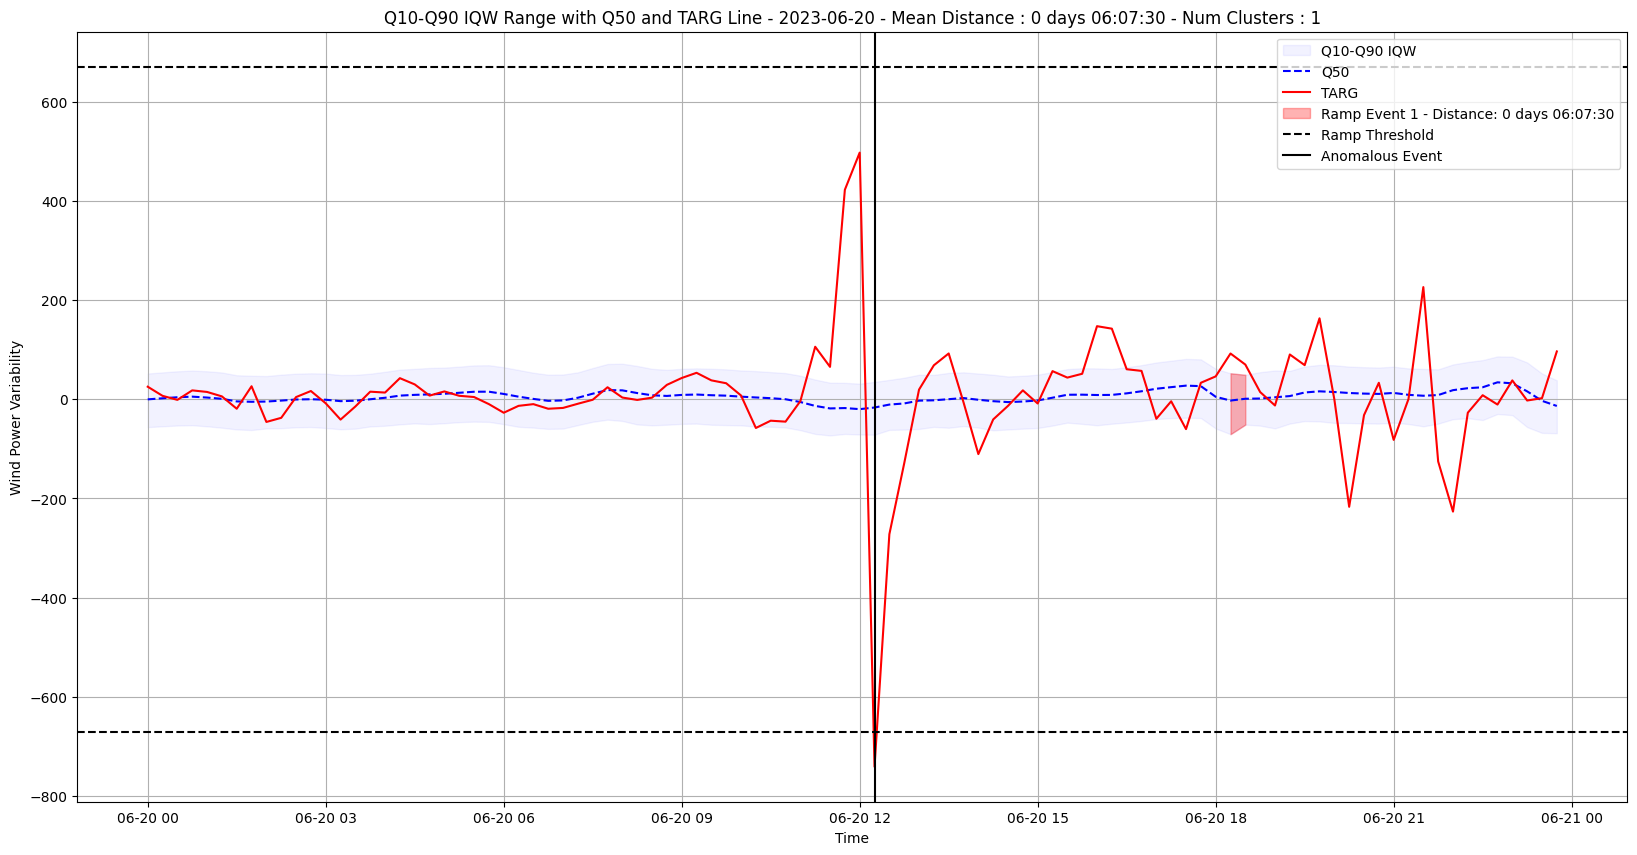

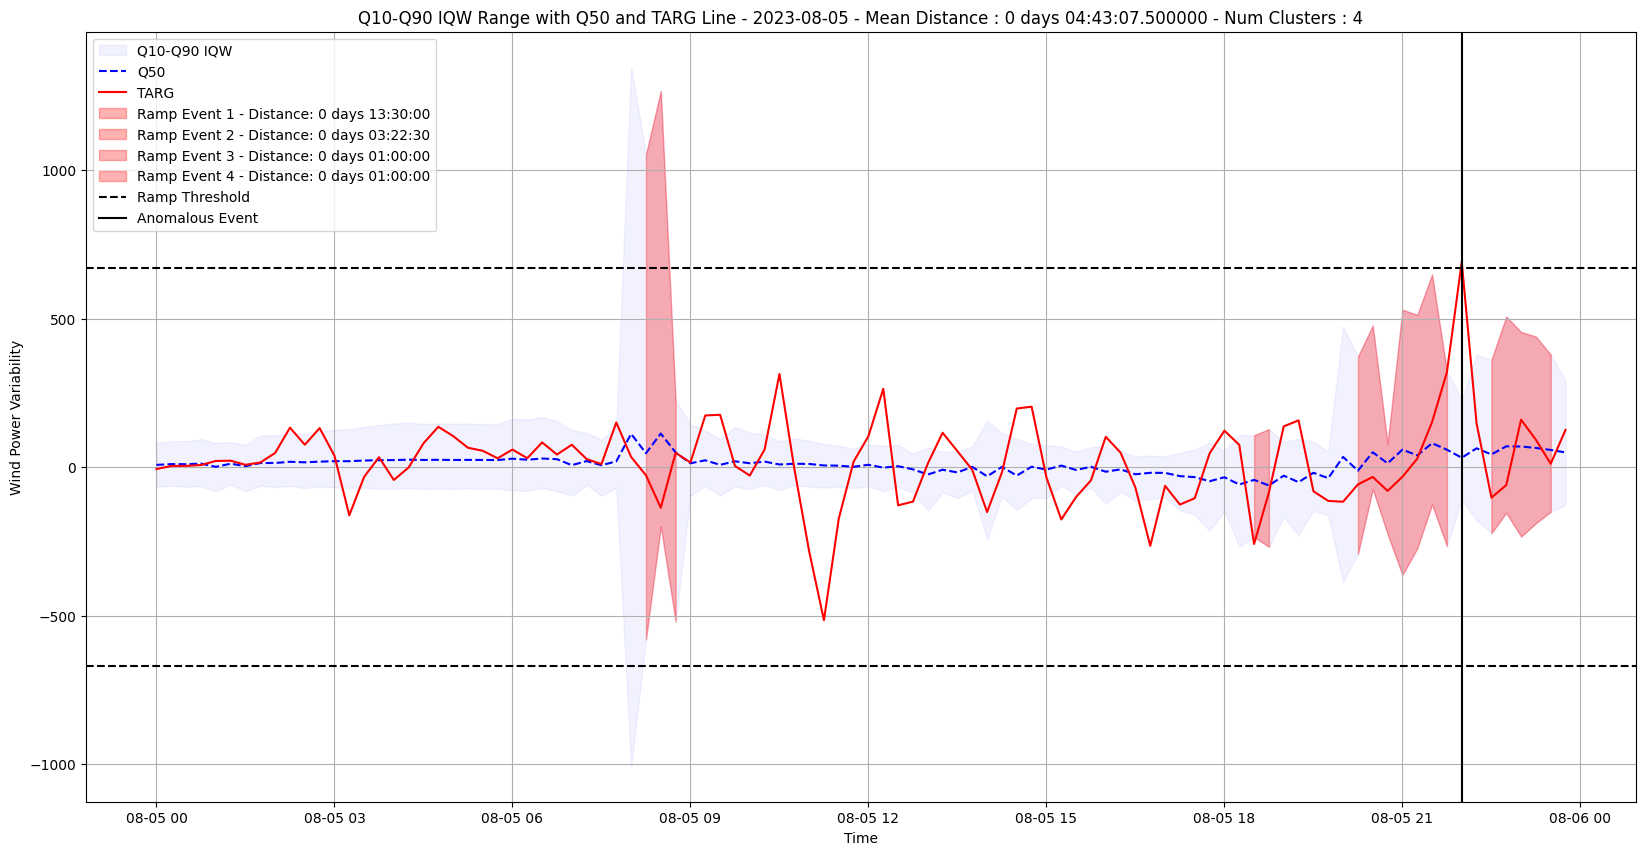

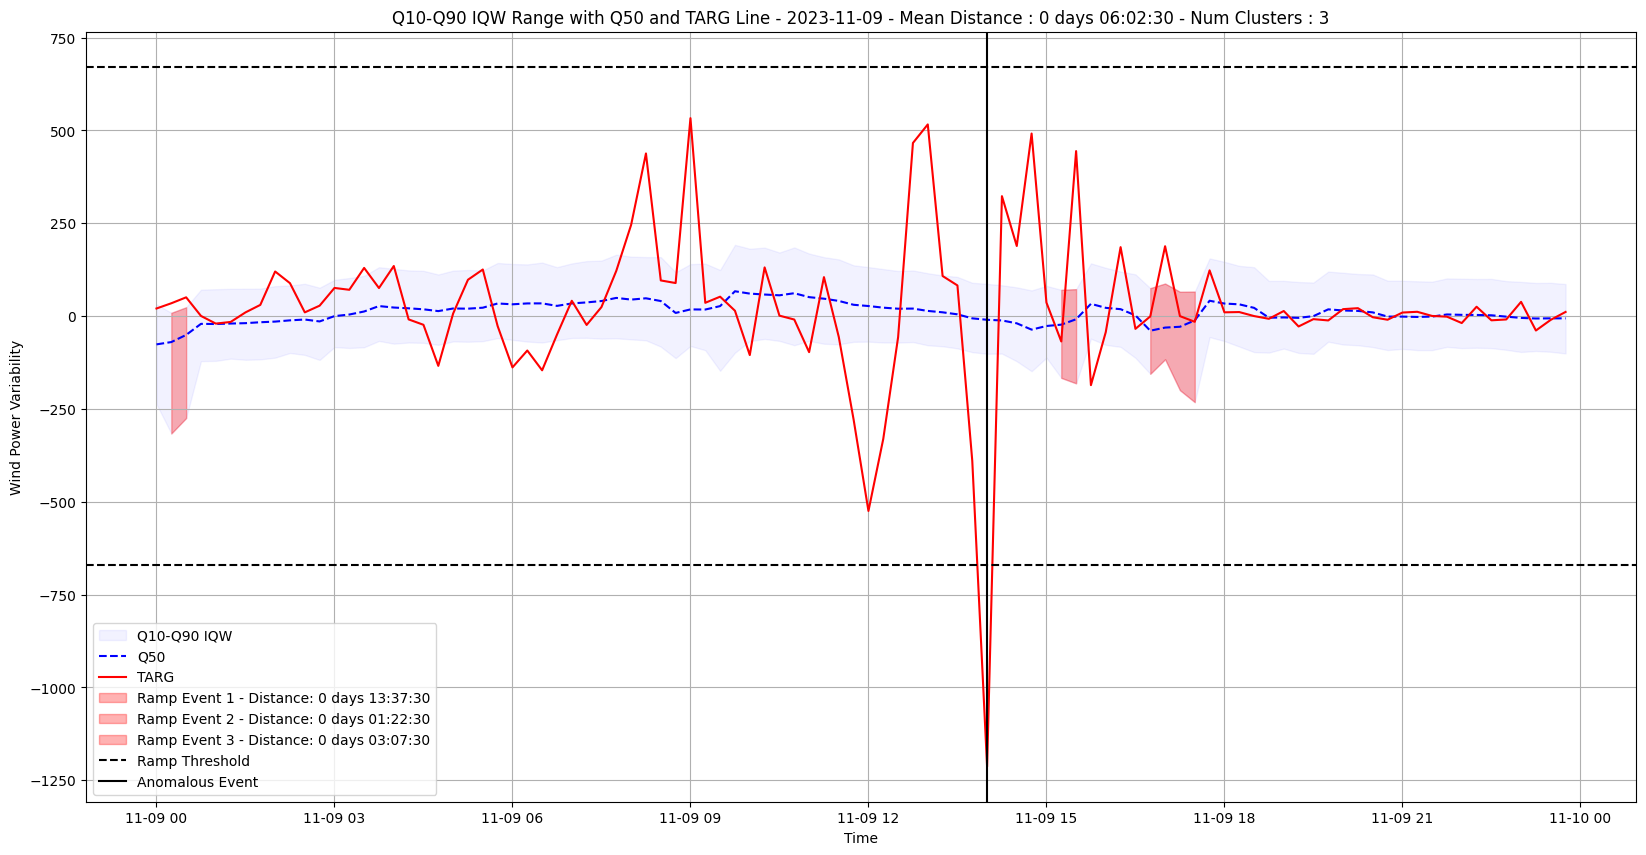

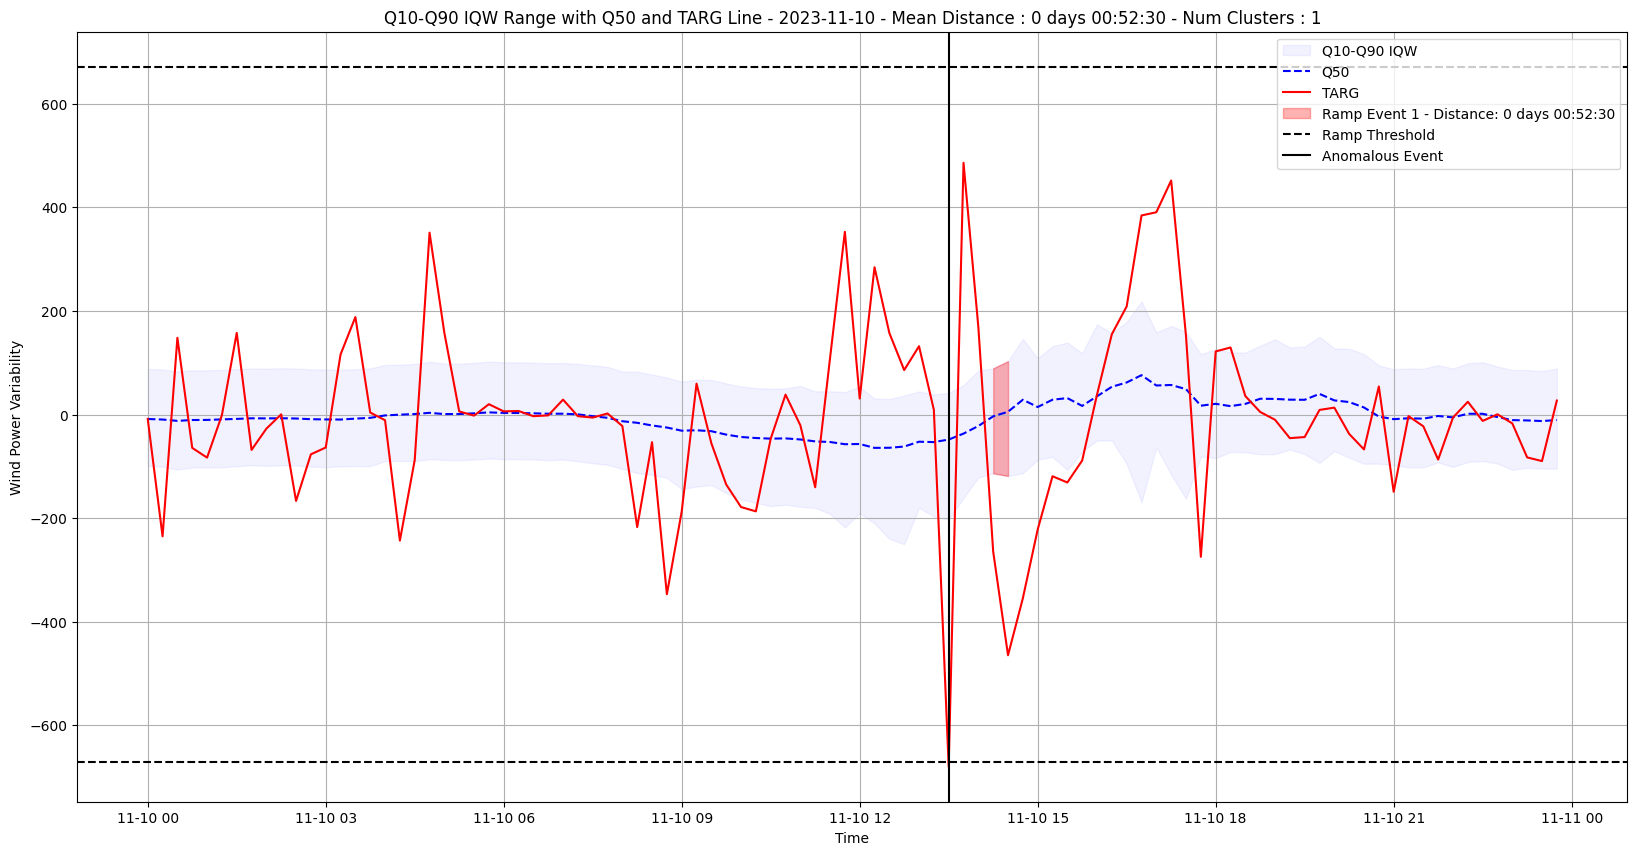

In [9]:
# Load results for ROC AUC scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{n_neighbors}_roc_auc_lof.pkl', 'rb') as f:
    data = pickle.load(f)

ramp_events_by_date = [data[i]['ramp_events_by_date'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
roc_auc = [data[i]['roc_auc'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]

df_ramp_events_detected, list_mean_distance = plot_ramp_events(ramp_events_by_date, 
                                                            list_ramp_alarm_days, 
                                                            ramp_threshold, 
                                                            plot_results=plot_results, 
                                                            max_consecutive_points=max_consecutive_points, 
                                                            plot_prediction=plot_prediction, 
                                                            plot_iqw=plot_iqw, 
                                                            cluster_color = cluster_color,
                                                            intraday=False)

In [10]:
if len(list_mean_distance) !=0:
    df_distance = pd.DataFrame(list_mean_distance)
    df_distance.columns = ['mean_distance_per_day', 'num_ramp', 'num_clusters']
    print(' ')
    print(df_distance)
    print('')
    print('Intraday Analysis: 8-hours time window')
    print('Error Phase', df_distance['mean_distance_per_day'].mean())
    print('Tot Number of Ramps Detected', df_distance['num_clusters'].sum())
    print('Tot Number of Ramps Observed', df_distance['num_ramp'].sum())
    # number of days with at least one ramp event
    print('Number of days with at least one ramp event', len(df_distance))

 
   mean_distance_per_day  num_ramp  num_clusters
0        0 days 00:45:00         1             1
1        0 days 02:52:30         1             1
2        0 days 05:15:00         2             1
3        0 days 02:26:15         1             2
4        0 days 17:15:00         1             1
5        0 days 00:07:30         1             1
6        0 days 06:07:30         1             1
7 0 days 04:43:07.500000         1             4
8        0 days 06:02:30         1             3
9        0 days 00:52:30         1             1

Intraday Analysis: 8-hours time window
Error Phase 0 days 04:38:41.250000
Tot Number of Ramps Detected 16
Tot Number of Ramps Observed 11
Number of days with at least one ramp event 10


In [11]:
n_neighbors = 25
contamination = 0.075

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/lof/{str_most_recent}/{max_consecutive_points}_{n_neighbors}_f1_lof.pkl', 'rb') as f:
    data = pickle.load(f)

ramp_events_by_intraday = [data[i]['ramp_events_by_intraday'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]
list_ramp_alarm_days = [data[i]['alarms_days'] for i in range(len(data)) if data[i]['contamination'] == contamination][0]


from config.ramp_calib_setting import Simulation
import pandas as pd
import pickle
from loguru import logger
from source.utils.file_read import process_and_concat_files 

sim_params = Simulation.testing_period

sim_params = Simulation.testing_period

# process and concatenate files
files = [sim_params['file_1'], sim_params['file_2'], sim_params['file_3'], sim_params['file_4'], 
            sim_params['file_5'], sim_params['file_6'], sim_params['file_7'], sim_params['file_8'], 
            sim_params['file_9'], sim_params['file_10'], sim_params['file_11'], sim_params['file_12']]

df = process_and_concat_files(files)
df_variability = df['measured'].diff().to_frame()

# add true positive if "predicted" == 1 and "ramp_event"==1
ramp_events_by_intraday['tp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 1)
# add false positive if "predicted" == 1 and "ramp_event"==0
ramp_events_by_intraday['fp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 0)
# add true negative if "predicted" == 0 and "ramp_event"==0
ramp_events_by_intraday['tn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 0)
# add false negative if "predicted" == 0 and "ramp_event"==1
ramp_events_by_intraday['fn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 1)

# groupby 8-hours and compute max and min
df_variability_intraday_max = df_variability.groupby(pd.Grouper(freq='8h')).agg({'measured': 'max'})
df_variability_intraday_min = df_variability.groupby(pd.Grouper(freq='8h')).agg({'measured': 'min'})
df_variability_intraday_max_min = df_variability_intraday_max.join(df_variability_intraday_min, lsuffix='_max', rsuffix='_min')

# # join with ramp_events_by_date by datetime on ramp_events_by_date
ramp_events_by_intraday = ramp_events_by_intraday.set_index('datetime')

df_variability_intraday = df_variability_intraday_max_min.join(ramp_events_by_intraday, how='inner')

df_variability_intraday['measured'] = df_variability_intraday.apply(lambda x: x['measured_max'] if abs(x['measured_max']) > abs(x['measured_min']) else x['measured_min'], axis=1)

# stack plot boxplot of variability by ramp event for true positive, false positive, true negative, false negative
df_variability_tp = df_variability_intraday[df_variability_intraday['tp'] == True]

# concatenate all list_ramp_alarm_days[i][0] for i in range(len(list_ramp_alarm_days))
list_ramp = [list_ramp_alarm_days[i][0] for i in range(len(list_ramp_alarm_days))]
df_is_anomalous = pd.concat([list_ramp_alarm_days[i][0] for i in range(len(list_ramp_alarm_days))])
df_is_anomalous = df_is_anomalous[df_is_anomalous['is_anomalous'] == True]
# get max Q90 and min Q10 for each 8-hour period
df_all = df_is_anomalous.groupby(pd.Grouper(freq='8h')).agg({'Q90': 'max', 'Q10': 'min'})
df_dropna = df_all.dropna()
# join df_variability_tp and df_dropna by datetime on df_variability_tp
df_variability_tp = df_variability_tp.join(df_dropna, how='inner')
df_variability_tp['direction'] = df_variability_tp.apply(lambda x: 'up' if abs(x['Q90']) > abs(x['Q10']) else 'down', axis=1) 
# if "measured" is positive and "direction" is "up" or "measured" is negative and "direction" is "down" then "correct" is True
df_variability_tp['correct'] = (df_variability_tp['measured'] > 0) & (df_variability_tp['direction'] == 'up') | (df_variability_tp['measured'] < 0) & (df_variability_tp['direction'] == 'down')
# count in percentage the number of correct predictions
df_variability_tp['correct'].value_counts(normalize=True) * 100

correct
True     75.0
False    25.0
Name: proportion, dtype: float64